We started by importing all necessary packages and ensuring that the data is mapped to the right headings. 

In [533]:
#importing necessary packages
import pandas as pd #data science essentials
import matplotlib.pyplot as plt #data visualization essentials
import seaborn as sns #enhanced data visulization
import numpy as np 
from os import listdir #importing listdir method to check location of files
from sklearn.model_selection import train_test_split # train/test split

#specifying the file
file= "./50k.csv"

#reading the file into Python with pandas
uscensus = pd.read_csv (file, names = ["Age", "Job", "Type_of_employment", "Hours_working_week", "Proceeds_of_transactions","Highest_level_education", "Years_of_education","Relationship_status", "Relationship_in_household","Race", "Gender", "Country", "Income_above"])

#printing the first rows of the dataset to check the alignment between the variables and the titles
print(uscensus.head(n=5))

   Age                 Job Type_of_employment  Hours_working_week  \
0   18   Handlers-cleaners            Private                  15   
1   24        Adm-clerical            Private                  35   
2   22     Exec-managerial            Private                   7   
3   64     Exec-managerial       Self-emp-inc                  40   
4   44      Prof-specialty   Self-emp-not-inc                  40   

   Proceeds_of_transactions Highest_level_education  Years_of_education  \
0                         0                    11th                   7   
1                         0            Some-college                  10   
2                         0               Bachelors                  13   
3                         0                 HS-grad                   9   
4                         0             Prof-school                  15   

   Relationship_status Relationship_in_household    Race   Gender  \
0        Never-married                 Own-child   White     Male

To get an overview of the available data we looked at the info of the dataframe.
We can see that we have 4 integer variables and 9 categorical variables.

In [534]:
#looking at the columns and datatypes of the dataframe(df)
print(uscensus.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24157 entries, 0 to 24156
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        24157 non-null  int64 
 1   Job                        24157 non-null  object
 2   Type_of_employment         24157 non-null  object
 3   Hours_working_week         24157 non-null  int64 
 4   Proceeds_of_transactions   24157 non-null  int64 
 5   Highest_level_education    24157 non-null  object
 6   Years_of_education         24157 non-null  int64 
 7   Relationship_status        24157 non-null  object
 8   Relationship_in_household  24157 non-null  object
 9   Race                       24157 non-null  object
 10  Gender                     24157 non-null  object
 11  Country                    24157 non-null  object
 12  Income_above               24157 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.4+ MB
None


The initial check for missing values only returns False. 

In [535]:
#initial check for missing values 
print(uscensus.isnull().any(axis=0))

Age                          False
Job                          False
Type_of_employment           False
Hours_working_week           False
Proceeds_of_transactions     False
Highest_level_education      False
Years_of_education           False
Relationship_status          False
Relationship_in_household    False
Race                         False
Gender                       False
Country                      False
Income_above                 False
dtype: bool


Therefore we check the descriptive statistics for both objects and numbers to check for anomalies. 

In [536]:
#looking at the descriptive statistics of the strings to check for anomalies
print(uscensus.describe(include = 'object'))

                    Job Type_of_employment Highest_level_education  \
count             24157              24157                   24157   
unique               15                  9                      16   
top      Prof-specialty            Private                 HS-grad   
freq               3092              16734                    7814   

        Relationship_status Relationship_in_household    Race Gender  \
count                 24157                     24157   24157  24157   
unique                    7                         6       5      2   
top      Married-civ-spouse                   Husband   White   Male   
freq                  11176                      9831   20629  16151   

               Country Income_above  
count            24157        24157  
unique              41            2  
top      United-States        <=50K  
freq             21585        18307  


In [537]:
#looking at the descriptive statistics of the integers to check for anomalies
print(uscensus.describe(include = 'number').round(decimals=2))

            Age  Hours_working_week  Proceeds_of_transactions  \
count  24157.00            24157.00                  24157.00   
mean      38.64               40.40                    997.56   
std       13.65               12.37                   7440.52   
min       17.00                1.00                  -4356.00   
25%       28.00               40.00                      0.00   
50%       37.00               40.00                      0.00   
75%       48.00               45.00                      0.00   
max       90.00               99.00                  99999.00   

       Years_of_education  
count            24157.00  
mean                10.08  
std                  2.57  
min                  1.00  
25%                  9.00  
50%                 10.00  
75%                 12.00  
max                 16.00  


For Proceeds of transactions we found an exceptionally high value of 99999. Especially as the 75% quartile is 0 we want to look a the distribution through a histogram. Furthermore, we are looking at the value counts to see whether there was just a handfull exceptionally high proceeds or whether this is a frequent occurance. 
We were able to see that the value 99999 exists 119 times, we are therefore certain that this is a missing value and replaced it with NaN. Afterwards we checked whether the replacement was successful. 

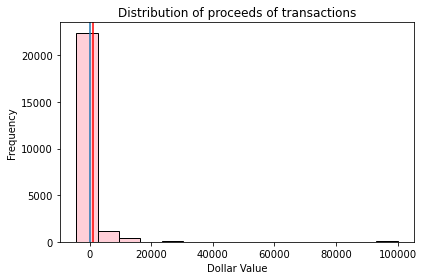

In [538]:
#proceeds_of_transactions has a 75% quartile of 0 and a max value of 99999 
#therefore we want to look at the overall data of Proceeds_of_transactions
#we choose to do that with a histogram as this provides us with a good overview

#creating a histogram for Proceeds of transactions
sns.histplot(data  = uscensus,
             x     ='Proceeds_of_transactions',
             bins  = 15,
             kde   = False,
             color = 'pink')


# this adds a title
plt.title(label = "Distribution of proceeds of transactions")


# this adds an x-label
plt.xlabel(xlabel = 'Dollar Value')


# this adds a y-label
plt.ylabel(ylabel = 'Frequency')

#adding the mean and the median 
plt.axvline(x=uscensus['Proceeds_of_transactions'].mean(),
           color = 'red')
plt.axvline(x=uscensus['Proceeds_of_transactions'].median())


# these compile and display the plot so that it is formatted as expected
plt.tight_layout()
plt.show()


In [539]:
#we can see that there is a big gap between the data that is clustered around 0/0 and the max of 99999
#we want to look at the exact numbers to see whether the 99999 is just a single occurance
print(uscensus.loc[:,"Proceeds_of_transactions"][uscensus.loc[:,"Proceeds_of_transactions"]>20000].value_counts(normalize = False,
                                                                                                          sort      = True,
                                                                                                          ascending = False))

99999    119
20051     27
27828     26
25236     10
34095      4
25124      3
22040      1
41310      1
Name: Proceeds_of_transactions, dtype: int64


In [540]:
#as there are 119 occurances of 99999 we are now certain that these are missing values 
#replacing the 99999 with NaN
uscensus = uscensus.replace(to_replace = 99999, value = np.nan)
print(uscensus.loc[:,"Proceeds_of_transactions"][uscensus.loc[:,"Proceeds_of_transactions"]>20000].value_counts(normalize = False,
                                                                                                          sort      = True,
                                                                                                          ascending = False))

20051.0    27
27828.0    26
25236.0    10
34095.0     4
25124.0     3
22040.0     1
41310.0     1
Name: Proceeds_of_transactions, dtype: int64


Next we checked the categorical variables for missing values by looking at their value counts. 
We were able to identify the questionmark as a placeholder for missing values in three different variables: Job, Country, Type of employment. 
After unsuccessfully replacing the questionmark with NaN we decide to look at the unique values for Job. We realize that the missing values are not marked by a questionmark but by a "space?". 
Accordingly, we successfully replace the "space?" with NaN. 

In [541]:
#looking for further anomalies with value_counts
for var in uscensus:
    try:
        float(uscensus[var][0])
    except:
        print(uscensus[var].value_counts(), end ="n\n\n\n")

 Prof-specialty       3092
 Craft-repair         3011
 Exec-managerial      3002
 Adm-clerical         2796
 Sales                2707
 Other-service        2415
 Machine-op-inspct    1484
 ?                    1450
 Transport-moving     1181
 Handlers-cleaners     972
 Farming-fishing       765
 Tech-support          670
 Protective-serv       487
 Priv-house-serv       117
 Armed-Forces            8
Name: Job, dtype: int64n


 Private             16734
 Self-emp-not-inc     1897
 Local-gov            1556
 ?                    1445
 State-gov             971
 Self-emp-inc          837
 Federal-gov           700
 Without-pay            12
 Never-worked            5
Name: Type_of_employment, dtype: int64n


 HS-grad         7814
 Some-college    5427
 Bachelors       3958
 Masters         1281
 Assoc-voc       1014
 11th             853
 Assoc-acdm       805
 10th             694
 7th-8th          484
 Prof-school      437
 9th              363
 12th             305
 Doctorate        3

In [542]:
#we were able to identify questionmarks as a placeholder for missing values in the categorical variables
#there are questionmarks in three columns: job, country and type of employment
uscensus = uscensus.replace(to_replace = "?", value = np.nan)

#verifying that the replacing of the questionmarks was successfull
for var in uscensus:
    try:
        float(uscensus[var][0])
    except:
        print(uscensus[var].value_counts(), end ="n\n\n\n")

 Prof-specialty       3092
 Craft-repair         3011
 Exec-managerial      3002
 Adm-clerical         2796
 Sales                2707
 Other-service        2415
 Machine-op-inspct    1484
 ?                    1450
 Transport-moving     1181
 Handlers-cleaners     972
 Farming-fishing       765
 Tech-support          670
 Protective-serv       487
 Priv-house-serv       117
 Armed-Forces            8
Name: Job, dtype: int64n


 Private             16734
 Self-emp-not-inc     1897
 Local-gov            1556
 ?                    1445
 State-gov             971
 Self-emp-inc          837
 Federal-gov           700
 Without-pay            12
 Never-worked            5
Name: Type_of_employment, dtype: int64n


 HS-grad         7814
 Some-college    5427
 Bachelors       3958
 Masters         1281
 Assoc-voc       1014
 11th             853
 Assoc-acdm       805
 10th             694
 7th-8th          484
 Prof-school      437
 9th              363
 12th             305
 Doctorate        3

In [543]:
#realizing we were unable to replace "?" therefore we need to dig deeper
#looking at the unique values of Job
print(uscensus.Job.unique())

[' Handlers-cleaners' ' Adm-clerical' ' Exec-managerial' ' Prof-specialty'
 ' Craft-repair' ' Sales' ' Farming-fishing' ' Transport-moving'
 ' Priv-house-serv' ' Other-service' ' Protective-serv' ' ?'
 ' Tech-support' ' Machine-op-inspct' ' Armed-Forces']


In [544]:
#by looking for unique values we were able to see that there is a space before the ?
#the missing values are actually represented by a "space?"
#accordingly we will try to replace those in the dataset
uscensus = uscensus.replace(' ?', np.nan)

#checking whether the .replace() has worked this time 
#taking a closer look at the frequencies of the categorical values 
for var in uscensus:
    try:
        float(uscensus[var][0])
    except:
        print(uscensus[var].value_counts(), end ="n\n\n\n")

 Prof-specialty       3092
 Craft-repair         3011
 Exec-managerial      3002
 Adm-clerical         2796
 Sales                2707
 Other-service        2415
 Machine-op-inspct    1484
 Transport-moving     1181
 Handlers-cleaners     972
 Farming-fishing       765
 Tech-support          670
 Protective-serv       487
 Priv-house-serv       117
 Armed-Forces            8
Name: Job, dtype: int64n


 Private             16734
 Self-emp-not-inc     1897
 Local-gov            1556
 State-gov             971
 Self-emp-inc          837
 Federal-gov           700
 Without-pay            12
 Never-worked            5
Name: Type_of_employment, dtype: int64n


 HS-grad         7814
 Some-college    5427
 Bachelors       3958
 Masters         1281
 Assoc-voc       1014
 11th             853
 Assoc-acdm       805
 10th             694
 7th-8th          484
 Prof-school      437
 9th              363
 12th             305
 Doctorate        303
 5th-6th          255
 1st-4th          130
 Presch

After identifying the missing values for numeric and categorical variables we want to see the sum of the missing values per variable as well as the total number of missing values. 
The total number of missing values is 3497. 
To get a better understanding of the number of missing values compared to the distribution we look at the value counts for Job, Country and Type of employment. We decided to create a histogram for Job as these value counts are closer together. This enables us a better overview. 
Country and Type of employment have a very clear mode and therefore don't require a histogram.

In [545]:
#we were able to replace all missing values both for categorical and numeric variables 
#now we count the missing values

job_mv=uscensus.loc[ : , 'Job'].isnull().sum(axis = 0)
country_mv=uscensus.loc[ : , 'Country'].isnull().sum(axis = 0)
employment_mv=uscensus.loc[ : , 'Type_of_employment'].isnull().sum(axis = 0)
proceeds_mv=uscensus.loc[ : , 'Proceeds_of_transactions'].isnull().sum(axis = 0)
sum_mv= int(job_mv)+int(country_mv)+int(employment_mv)+int(proceeds_mv)

print(f"Job missing values: {job_mv} ")
print(f"Country missing values: {country_mv} ")
print(f"Type of employment missing values: {employment_mv} ")
print(f"Proceeds of transactions missing values: {proceeds_mv} ")
print(f"""
Total number of missing values: {sum_mv}
""")

Job missing values: 1450 
Country missing values: 483 
Type of employment missing values: 1445 
Proceeds of transactions missing values: 119 

Total number of missing values: 3497



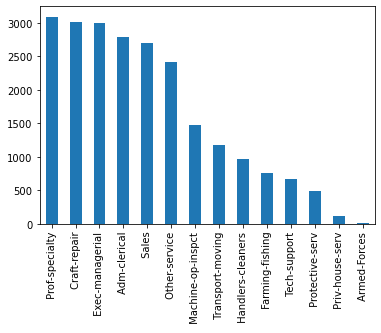

 Prof-specialty       3092
 Craft-repair         3011
 Exec-managerial      3002
 Adm-clerical         2796
 Sales                2707
 Other-service        2415
 Machine-op-inspct    1484
 Transport-moving     1181
 Handlers-cleaners     972
 Farming-fishing       765
 Tech-support          670
 Protective-serv       487
 Priv-house-serv       117
 Armed-Forces            8
Name: Job, dtype: int64

Sum: 22707


In [546]:
#taking a closer look a the distribution of the data with the missing values
#creating a histogram to simplify the overview
#creating value counts for comparison to the missing values 
Job_vc=uscensus.Job.value_counts()
Job_vc.plot(kind='bar')
plt.show()
print(uscensus.loc[:,"Job"].value_counts())
print(f"""
Sum: {uscensus.loc[:,"Job"].value_counts().sum()}""")

In [547]:
#taking a closer look a the distribution of the data with the missing values
#creating value counts for comparison to the missing values 
print(uscensus.loc[:,"Country"].value_counts())
print(f"""
Sum: {uscensus.loc[:,"Country"].value_counts().sum()}""")

 United-States                 21585
 Mexico                          491
 Philippines                     151
 Germany                         104
 Canada                           89
 India                            81
 Puerto-Rico                      80
 El-Salvador                      78
 Cuba                             69
 England                          64
 Jamaica                          63
 South                            57
 Vietnam                          54
 Dominican-Republic               53
 China                            52
 Italy                            51
 Japan                            50
 Guatemala                        50
 Columbia                         47
 Poland                           43
 Taiwan                           37
 Iran                             35
 Haiti                            28
 Portugal                         27
 Nicaragua                        22
 Peru                             22
 Ecuador                          21
 

In [548]:
#taking a closer look a the distribution of the data with the missing values
#creating value counts for comparison to the missing values 
print(uscensus.loc[:,"Type_of_employment"].value_counts())
print(f"""
Sum: {uscensus.loc[:,"Type_of_employment"].value_counts().sum()}""")

 Private             16734
 Self-emp-not-inc     1897
 Local-gov            1556
 State-gov             971
 Self-emp-inc          837
 Federal-gov           700
 Without-pay            12
 Never-worked            5
Name: Type_of_employment, dtype: int64

Sum: 22712


As a last step of our missing value analysis we created missing value flags and compared these with the original number of missing values. 

In [549]:
# developing a loop to automatically flag missing values
df=uscensus

for col in df:

    if df[col].isnull().astype(int).sum() > 0:
        df['m_'+col] = df[col].isnull().astype(int)

print(df.columns)

Index(['Age', 'Job', 'Type_of_employment', 'Hours_working_week',
       'Proceeds_of_transactions', 'Highest_level_education',
       'Years_of_education', 'Relationship_status',
       'Relationship_in_household', 'Race', 'Gender', 'Country',
       'Income_above', 'm_Job', 'm_Type_of_employment',
       'm_Proceeds_of_transactions', 'm_Country'],
      dtype='object')


In [550]:
#verifying that all missing values are included in the missing value flags columns
print(f"""
Original Missing Value Counts:
------------------------------
{uscensus.loc[:,"Job"].value_counts()}


Sums of Missing Value Flags
--------------------------
{copy_uscensus.loc[:,"Job"].value_counts()}

""")



Original Missing Value Counts:
------------------------------
 Prof-specialty       3092
 Craft-repair         3011
 Exec-managerial      3002
 Adm-clerical         2796
 Sales                2707
 Other-service        2415
 Machine-op-inspct    1484
 Transport-moving     1181
 Handlers-cleaners     972
 Farming-fishing       765
 Tech-support          670
 Protective-serv       487
 Priv-house-serv       117
 Armed-Forces            8
Name: Job, dtype: int64


Sums of Missing Value Flags
--------------------------
 Prof-specialty       4542
 Craft-repair         3011
 Exec-managerial      3002
 Adm-clerical         2796
 Sales                2707
 Other-service        2415
 Machine-op-inspct    1484
 Transport-moving     1181
 Handlers-cleaners     972
 Farming-fishing       765
 Tech-support          670
 Protective-serv       487
 Priv-house-serv       117
 Armed-Forces            8
Name: Job, dtype: int64




Before we started replacing the missing values we created a new DataFrame to enable comparisons between the DataFrame with missing values and the one with imputed values.
Since the distribution for Proceeds of transactions appears skewed positive, the median better represents the center of this distribution. Therefore, we should choose the median to fill in missing values.
For the categorical variables we chose the mode to fill the missing values. 
To ensure this was successful we checked the missing value count at the end. Lastly we checked that the missing values were added to the right variable. 

In [551]:
#creating a copy of the dataframe before replacing the missing values 
copy_uscensus = pd.DataFrame.copy(uscensus)

In [552]:
#imputing missing values with fillna for the numeric variable 
proceeds_median= copy_uscensus['Proceeds_of_transactions'].median()
copy_uscensus['Proceeds_of_transactions'] = copy_uscensus['Proceeds_of_transactions'].fillna(proceeds_median)

#imputing missing values with fillna for the categorical variables 
copy_uscensus["Job"].fillna(value=copy_uscensus["Job"].mode()[0], inplace =True)

copy_uscensus["Country"].fillna(value=copy_uscensus["Country"].mode()[0], inplace = True)

copy_uscensus["Type_of_employment"].fillna(value=copy_uscensus["Type_of_employment"].mode()[0], inplace =True)

print(copy_uscensus.isnull().sum(axis = 0))


Age                           0
Job                           0
Type_of_employment            0
Hours_working_week            0
Proceeds_of_transactions      0
Highest_level_education       0
Years_of_education            0
Relationship_status           0
Relationship_in_household     0
Race                          0
Gender                        0
Country                       0
Income_above                  0
m_Job                         0
m_Type_of_employment          0
m_Proceeds_of_transactions    0
m_Country                     0
dtype: int64


In [553]:
#verifying that all missing values are included in the missing value flags columns
print(f"""
Employment without missing values:
---------------------------------------
{uscensus.loc[:,"Type_of_employment"].value_counts()}


Employment with imputed missing values:
---------------------------------------
{copy_uscensus.loc[:,"Type_of_employment"].value_counts()}

""")



Employment without missing values:
---------------------------------------
 Private             16734
 Self-emp-not-inc     1897
 Local-gov            1556
 State-gov             971
 Self-emp-inc          837
 Federal-gov           700
 Without-pay            12
 Never-worked            5
Name: Type_of_employment, dtype: int64


Employment with imputed missing values:
---------------------------------------
 Private             18179
 Self-emp-not-inc     1897
 Local-gov            1556
 State-gov             971
 Self-emp-inc          837
 Federal-gov           700
 Without-pay            12
 Never-worked            5
Name: Type_of_employment, dtype: int64




In the next step we created dummie variables for the categorical variables. To keep it flexible we decided to code each line which enabled us to choose the number of variables that we wanted to create dummie variables for on demand.

In [554]:
#creaing dummies for some of the categorical variables and adding them to the df 
#no loop to easier add and remove dummies for different variables
#we are also not dropping the original columns as we are going to create bins in excel where this information helps

#copy_uscensus = pd.concat([copy_uscensus, pd.get_dummies(df['Job'])], axis=1)
copy_uscensus = pd.concat([copy_uscensus, pd.get_dummies(df['Type_of_employment'])], axis=1)
#copy_uscensus = pd.concat([copy_uscensus, pd.get_dummies(df['Highest_level_education'])], axis=1)
#copy_uscensus = pd.concat([copy_uscensus, pd.get_dummies(df['Relationship_in_household'])], axis=1)
#copy_uscensus = pd.concat([copy_uscensus, pd.get_dummies(df['Country_of_birth'])], axis=1)
copy_uscensus = pd.concat([copy_uscensus, pd.get_dummies(df['Race'])], axis=1)
copy_uscensus = pd.concat([copy_uscensus, pd.get_dummies(df['Gender'])], axis=1)
#copy_uscensus = pd.concat([copy_uscensus, pd.get_dummies(df['Country'])], axis=1)
copy_uscensus = pd.concat([copy_uscensus, pd.get_dummies(df['Income_above'])], axis=1)

#template in case we at somepoint want to drop the original columns 
#copy_uscensus = pd.concat([copy_uscensus.drop('Job', axis=1), pd.get_dummies(copy_uscensus['Job'])], axis=1)

print(copy_uscensus.head(n=10))

   Age                 Job Type_of_employment  Hours_working_week  \
0   18   Handlers-cleaners            Private                  15   
1   24        Adm-clerical            Private                  35   
2   22     Exec-managerial            Private                   7   
3   64     Exec-managerial       Self-emp-inc                  40   
4   44      Prof-specialty   Self-emp-not-inc                  40   
5   36        Craft-repair            Private                  55   
6   26     Exec-managerial            Private                  40   
7   31      Prof-specialty   Self-emp-not-inc                  50   
8   24               Sales            Private                  40   
9   50     Exec-managerial            Private                  55   

   Proceeds_of_transactions Highest_level_education  Years_of_education  \
0                       0.0                    11th                   7   
1                       0.0            Some-college                  10   
2              

Lastly, we seperated the y variable Income and randomly created the train and test dataframes before we exported the results to excel. 

In [555]:
#seperating our y variable Income from the rest of the data

# preparing explanatory variable data
uscensus_data   = copy_uscensus.drop(['Income_above'],
                                axis = 1)


# preparing response variable data
uscensus_target = copy_uscensus.loc[ : , 'Income_above']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            uscensus_data,
            uscensus_target,
            test_size = 0.20,
            random_state = 1223)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (19325, 33)
y-side: 19325


Testing Data
------------
X-side: (4832, 33)
y-side: 4832



In [556]:
#creating four df, two for the training data, two for the testing data
#test df for x and y variables
train_features = pd.concat([x_train], axis = 1)

train_y = pd.concat([y_train], axis = 1)

#test df for x and y variables
test_features = pd.concat([x_test], axis = 1)

test_y = pd.concat([y_test], axis = 1)



In [557]:
# saving the training set as two Excel files
train_features.to_excel(excel_writer = "uscensus_train_x.xlsx",
                        index        = False)

train_y.to_excel(excel_writer = "uscensus_train_y.xlsx",
                        index        = False)

# saving the testing set as two Excel files
test_features.to_excel(excel_writer = "uscensus_test_x.xlsx",
                       index        = False)

test_y.to_excel(excel_writer = "uscensus_test_y.xlsx",
                       index        = False)